In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/EEG_data_ICA1.csv', header = None)
data1 = pd.read_csv('/content/testdatafordataset.csv', header = None)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,30990,30991,30992,30993,30994,30995,30996,30997,30998,30999
0,-3.647938,-4.236482,-4.954218,-5.703854,-6.370552,-6.847448,-7.067554,-7.024490,-6.767700,-6.391287,...,-9.131446,-9.788573,-10.630718,-11.571750,-12.503213,-13.310268,-13.897217,-14.219401,-14.292770,-14.174742
1,4.476049,1.208021,-2.546008,-6.187074,-9.110961,-10.881581,-11.359700,-10.723959,-9.342140,-7.663466,...,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414
2,-6.347912,-5.884709,-5.160955,-4.313504,-3.520005,-2.929158,-2.589652,-2.427794,-2.302782,-2.089603,...,1.422581,2.712180,3.496467,3.722805,3.551736,3.276709,3.171436,3.322766,3.596477,3.720173
3,13.990337,12.876663,11.885061,11.246529,11.026799,11.051213,10.949800,10.311268,8.878328,6.677271,...,0.000859,0.000859,0.000859,0.000859,0.000859,0.000859,0.000859,0.000859,0.000859,0.000859
4,-1.489817,-3.518470,-5.228010,-6.166703,-6.170847,-5.466310,-4.591854,-4.189853,-4.813576,-6.738621,...,-16.573137,-13.786069,-8.781780,-2.250303,4.805433,11.152488,15.541342,17.047809,15.472960,11.548272


In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,30990,30991,30992,30993,30994,30995,30996,30997,30998,30999
0,-3.647938,-4.236482,-4.954218,-5.703854,-6.370552,-6.847448,-7.067554,-7.024490,-6.767700,-6.391287,...,-9.131446,-9.788573,-10.630718,-11.571750,-12.503213,-13.310268,-13.897217,-14.219401,-14.292770,-14.174742
1,4.476049,1.208021,-2.546008,-6.187074,-9.110961,-10.881581,-11.359700,-10.723959,-9.342140,-7.663466,...,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414,-0.000414
2,-6.347912,-5.884709,-5.160955,-4.313504,-3.520005,-2.929158,-2.589652,-2.427794,-2.302782,-2.089603,...,1.422581,2.712180,3.496467,3.722805,3.551736,3.276709,3.171436,3.322766,3.596477,3.720173
3,13.990337,12.876663,11.885061,11.246529,11.026799,11.051213,10.949800,10.311268,8.878328,6.677271,...,0.000859,0.000859,0.000859,0.000859,0.000859,0.000859,0.000859,0.000859,0.000859,0.000859
4,-1.489817,-3.518470,-5.228010,-6.166703,-6.170847,-5.466310,-4.591854,-4.189853,-4.813576,-6.738621,...,-16.573137,-13.786069,-8.781780,-2.250303,4.805433,11.152488,15.541342,17.047809,15.472960,11.548272


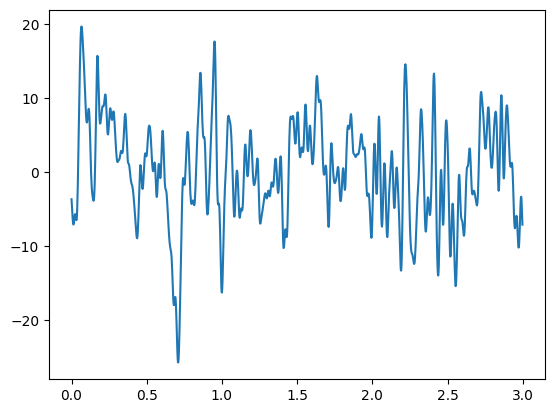

In [3]:
t = np.arange(0, 3, 1/500)
plt.plot(t, data.iloc[0, 0:1500])

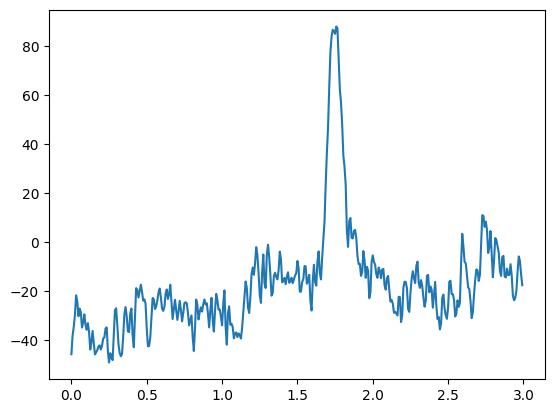

In [4]:
t = np.arange(0, 3, 1/128)
plt.plot(t, data1.iloc[0, 0:384])

In [5]:
def time_shift(eeg_signal, max_shift=12):
  shift = np.random.randint(-max_shift, max_shift)
  return np.roll(eeg_signal, shift, axis=0)

def augment_and_store_data(X_eeg, augmentation_factor):
  X_augmented = []
  for i in range(len(X_eeg)):
    X_augmented.append(X_eeg[i])
    for _ in range(augmentation_factor):
      augmented_signal = time_shift(X_eeg[i])
      X_augmented.append(augmented_signal)
  X_augmented = np.array(X_augmented)
  return X_augmented

print("Before")
print("Augmented dataset size:", data.shape[0])
augmentation_factor = 18
eeg = augment_and_store_data(data, augmentation_factor=augmentation_factor)
print("After")
print("Augmented Stress dataset size:", eeg.shape[0])

Before
Augmented dataset size: 72
After
Augmented Stress dataset size: 1368


In [6]:
eeg.shape

(1368, 72)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

eeg = scaler.fit_transform(eeg)

In [8]:
print(eeg)

[[ 5.29527346e-02  2.91518167e-01 -5.22600883e-02 ... -3.87296316e-01
   4.16527099e-02 -5.78295181e-02]
 [ 1.32303899e-02  1.56787066e-01 -6.51390588e-02 ... -2.28571419e-01
  -3.69644172e-02  2.99077366e-01]
 [ 3.17292656e-01  4.62786857e-04  1.52236828e-01 ...  1.09783267e-01
   8.12584666e-02  8.62634167e-02]
 ...
 [-5.69523252e-01  2.27784629e-01 -2.52565758e-01 ... -2.20853910e-01
   3.24416815e-01  4.24419061e-02]
 [-1.60820020e-01  2.24373255e-01  4.86359103e-01 ... -3.52413310e-01
   6.18530580e-01  9.69859169e-01]
 [ 5.70587271e-02 -5.74947642e-01  2.24542114e-01 ... -2.09256604e-01
   9.18227915e-02  4.03833767e-01]]


In [9]:
def create_lstm_sequences(d, window_size):
    sequences = []
    targets = []

    for i in range(len(d) - window_size):
        sequences.append(d[i:i + window_size])
        targets.append(d[i:i + window_size])

    return np.array(sequences), np.array(targets)

In [10]:
X, Y = [], []
num_patients = eeg.shape[0]
input_length = 10
for patient in range(num_patients):
    x_seq, y_seq = create_lstm_sequences(eeg[patient], input_length)
    X.append(x_seq)
    Y.append(y_seq)

X = np.vstack(X).reshape(-1, input_length, 1)
Y = np.vstack(Y).reshape(-1, input_length, 1)

In [11]:
print(X)

[[[ 0.05295273]
  [ 0.29151817]
  [-0.05226009]
  ...
  [ 0.30886599]
  [-0.06194952]
  [ 0.19482542]]

 [[ 0.29151817]
  [-0.05226009]
  [ 0.58447805]
  ...
  [-0.06194952]
  [ 0.19482542]
  [ 0.2906374 ]]

 [[-0.05226009]
  [ 0.58447805]
  [ 0.07670438]
  ...
  [ 0.19482542]
  [ 0.2906374 ]
  [-0.50972786]]

 ...

 [[-0.09512693]
  [-0.10896993]
  [ 0.26786685]
  ...
  [-0.11892571]
  [ 0.02879563]
  [-0.35584779]]

 [[-0.10896993]
  [ 0.26786685]
  [-0.3196509 ]
  ...
  [ 0.02879563]
  [-0.35584779]
  [-0.2092566 ]]

 [[ 0.26786685]
  [-0.3196509 ]
  [-0.05886773]
  ...
  [-0.35584779]
  [-0.2092566 ]
  [ 0.09182279]]]


In [12]:
print(f"Training Data Shape: {X.shape}, Target Shape: {Y.shape}")

Training Data Shape: (84816, 10, 1), Target Shape: (84816, 10, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size=0.7)

In [14]:
print(X_train)
print("_______________________")
print(Y_train)

[[[-0.00331286]
  [-0.04153162]
  [-0.16597701]
  ...
  [-0.36037731]
  [ 0.23394079]
  [-0.17110215]]

 [[ 0.00092063]
  [ 0.14804197]
  [ 0.07238237]
  ...
  [-0.47013067]
  [-0.29890228]
  [ 0.10055604]]

 [[ 0.17215637]
  [-0.08315788]
  [ 0.19518386]
  ...
  [-0.34904205]
  [-0.12794906]
  [-0.49547064]]

 ...

 [[-0.0250034 ]
  [ 0.34068695]
  [-0.0922651 ]
  ...
  [-0.12743347]
  [ 0.67154366]
  [-0.11388632]]

 [[ 0.08045622]
  [ 0.06612913]
  [ 0.01155271]
  ...
  [ 0.24740357]
  [ 0.45609085]
  [ 0.21822708]]

 [[ 0.39337675]
  [ 0.0207022 ]
  [-0.65965605]
  ...
  [ 0.04278194]
  [ 0.23774075]
  [ 0.0682311 ]]]
_______________________
[[[-0.00331286]
  [-0.04153162]
  [-0.16597701]
  ...
  [-0.36037731]
  [ 0.23394079]
  [-0.17110215]]

 [[ 0.00092063]
  [ 0.14804197]
  [ 0.07238237]
  ...
  [-0.47013067]
  [-0.29890228]
  [ 0.10055604]]

 [[ 0.17215637]
  [-0.08315788]
  [ 0.19518386]
  ...
  [-0.34904205]
  [-0.12794906]
  [-0.49547064]]

 ...

 [[-0.0250034 ]
  [ 0.340686

In [15]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)

(59371, 10, 1)
(59371, 10, 1)
(7633, 10, 1)
(7633, 10, 1)
(17812, 10, 1)
(17812, 10, 1)


In [16]:
dataa = pd.read_csv('/content/FilteredICA_datasetfortrain&test.csv', header = None)

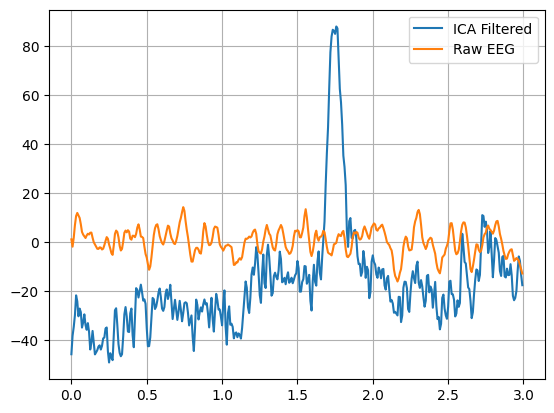

In [17]:
t = np.arange(0, 3, 1/128)
plt.plot(t, data1.iloc[0, 0:384], label="ICA Filtered")
plt.plot(t, dataa.iloc[0, 0:384], label="Raw EEG")
plt.grid(True)

plt.legend()
plt.show()

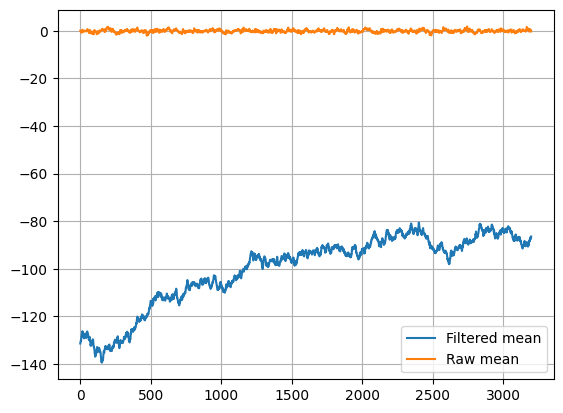

In [18]:
plt.plot(data1.to_numpy().mean(axis = 0), label="Filtered mean")
plt.plot(dataa.to_numpy().mean(axis = 0), label="Raw mean")
plt.grid(True)
plt.legend()
plt.show()

In [19]:
dataa.head()

,0,1,2,3,4,5,6,7,8,9,...,3190,3191,3192,3193,3194,3195,3196,3197,3198,3199
0,1.151066,-1.830856,1.829490,6.943420,10.655564,11.914994,10.946346,9.884031,7.331834,4.182472,...,-9.455924,-6.766012,-6.471692,-6.354001,-6.514144,-5.856024,-3.949343,-1.075065,1.410474,0.711441
1,-0.594913,3.775753,3.211741,1.515633,0.613027,1.014480,2.277457,2.764474,2.623779,1.549349,...,-7.892766,-4.817986,0.562023,5.802153,8.414080,8.799998,7.024003,3.768977,0.414184,-0.887148
2,-0.277983,-0.890580,-1.160673,-0.655225,0.518229,1.903886,2.889979,2.744957,1.131598,-2.168258,...,-8.089242,-6.499131,-5.916081,-4.596159,-3.647146,-2.101150,0.163103,2.608751,3.714525,0.648484
3,0.578452,-2.432949,-3.618859,-4.614876,-5.925532,-7.305047,-8.138089,-6.185515,-5.058382,-5.029153,...,1.596533,1.433830,2.238529,5.042188,7.160583,7.545865,5.746249,2.358892,-0.547176,0.991871
4,1.528520,-12.089845,-9.862694,-2.049794,5.251898,9.246315,9.576375,8.276976,6.774186,4.589032,...,-9.500594,-10.023884,-9.615547,-7.191845,-2.102817,4.253800,10.294786,13.747271,11.645026,0.324754


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

model = Sequential()

model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(10, 1)))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(RepeatVector(10))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 10, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 10, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 10, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,529 (244.25 KB)

 Trainable params: 62,529 (244.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

In [22]:
history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=100, batch_size=32, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 59s 27ms/step - loss: 0.0702 - val_loss: 0.0466 - learning_rate: 0.0010
Epoch 2/100
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - loss: 0.0425 - val_loss: 0.0272 - learning_rate: 0.0010
Epoch 3/100
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 0.0218 - val_loss: 0.0113 - learning_rate: 0.0010
Epoch 4/100
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0088 - val_loss: 0.0061 - learning_rate: 0.0010
Epoch 5/100
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - loss: 0.0022 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 6/100
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - loss: 7.5845e-04 - val_loss: 9.0805e-04 - learning_rate: 0.0010
Epoch 7/100
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - loss: 5.3482e-04 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 8/100
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - loss: 4.4197e-04 - val_loss: 6.7652e-04 - learning_rate: 0.0010
Epoch 9/100
1856/1856 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - l

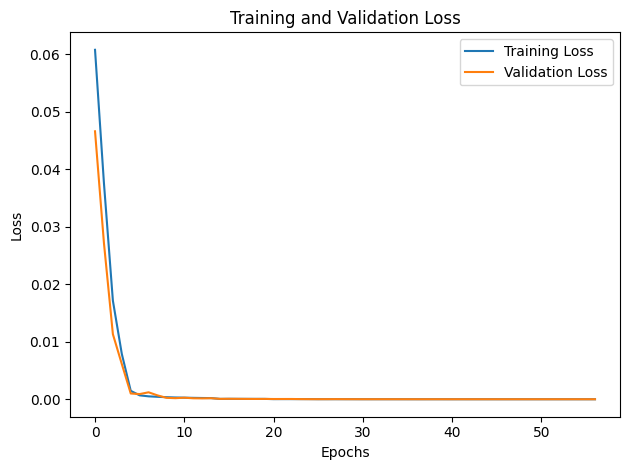

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
test_loss = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}')

557/557 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 6.2979e-06
Test Loss: 6.227380254131276e-06


In [25]:
y = model.predict(X_test)

557/557 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


In [26]:
y.shape

(17812, 10, 1)

In [27]:
x = X_test.flatten()
y = y.flatten()
x = x[0:720]
y = y[0:720]

x.shape

(720,)

In [28]:
length = x.size//72
print(length)
x = x.reshape(length, 72)
y = y.reshape(length, 72)

10


In [29]:
x = scaler.inverse_transform(x)
y = scaler.inverse_transform(y)

In [30]:
x = x.flatten()
y = y.flatten()

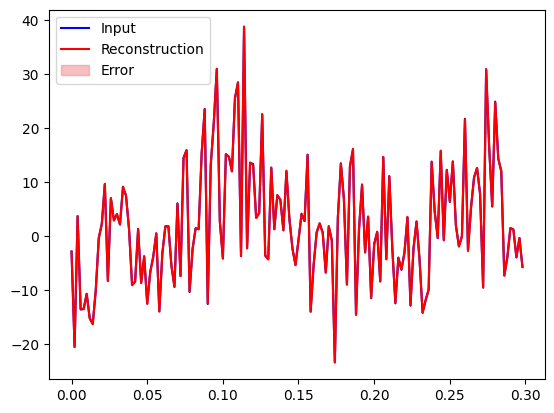

In [31]:
num_points_to_plot = 150

t = np.arange(0, num_points_to_plot * (1/500), 1/500)

plt.plot(t, x[0:num_points_to_plot], 'b', label="Input")

plt.plot(t, y[0:num_points_to_plot], 'r', label="Reconstruction")

plt.fill_between(t, y[0:num_points_to_plot], x[0:num_points_to_plot], color='lightcoral', alpha=0.5, label="Error")

plt.legend()
plt.show()

In [32]:
model.save("eeg_denoiser.keras")
print("Model saved successfully as 'eeg_denoiser.keras'")

Model saved successfully as 'eeg_denoiser.keras'


In [33]:
from tensorflow.keras.models import load_model
mdl = load_model("eeg_denoiser.keras")
mdl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 10, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 10, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 10, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,589 (732.77 KB)

 Trainable params: 62,529 (244.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 125,060 (488.52 KB)

In [54]:
d = pd.read_csv('/content/testdatafordataset.csv', header = None)
d.head()

,0,1,2,3,4,5,6,7,8,9,...,3190,3191,3192,3193,3194,3195,3196,3197,3198,3199
0,-45.664091,-38.168010,-34.514413,-29.766669,-21.671716,-24.109121,-30.203429,-27.055467,-28.506785,-34.801619,...,-0.072257,-3.219217,-5.382327,-1.410220,-0.676941,-10.219825,-15.288770,-8.101174,-2.852897,-6.831406
1,-23.656018,-23.778735,-21.017770,-20.294158,-23.157425,-24.363806,-21.821815,-21.419422,-23.710706,-24.023654,...,-16.061722,5.661548,15.419008,1.615193,0.164479,11.801017,11.335459,4.751947,1.878272,1.246987
2,6.706254,4.167284,5.334106,3.572288,2.939309,13.738744,17.062323,4.149745,-0.918932,3.546382,...,-11.567825,-12.873620,-8.645185,-0.190782,-1.888525,-10.756878,-5.842605,9.356821,12.640870,3.392053
3,-97.774580,-91.280273,-74.809785,-81.146142,-92.189391,-87.925553,-89.740485,-101.814391,-107.596798,-103.259003,...,-213.797896,-217.521564,-209.619415,-222.451689,-229.284452,-216.086464,-214.933583,-224.364663,-224.228132,-223.023199
4,-45.164623,-53.345655,-50.145277,-64.220188,-70.406119,-50.868021,-36.736011,-44.691273,-63.689795,-72.847643,...,-73.956520,-80.484013,-98.100103,-122.241473,-136.010083,-122.071046,-103.476625,-101.367829,-117.367557,-126.662016


In [55]:
x = d.to_numpy().flatten()

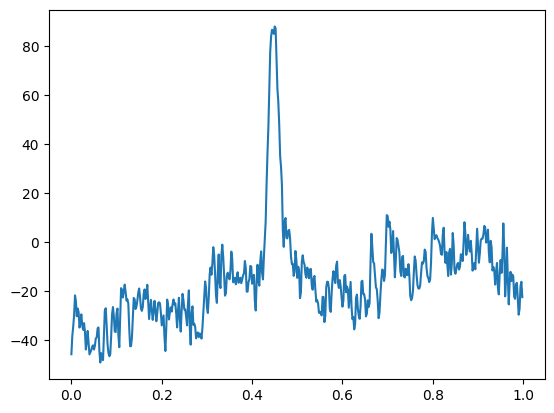

In [56]:
t = np.arange(0, 1, 1/500)
plt.plot(t, x[0:500])
plt.show()

In [57]:
x = x[0:7200]
x.shape

(7200,)

In [58]:
x1 = x.reshape(100, 72)
x1 = scaler.fit_transform(x1)

In [59]:
x1 = x1.reshape(720, 10, 1)

In [60]:
x1.shape

(720, 10, 1)

In [61]:
y = model.predict(x1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [62]:
y.shape

(720, 10, 1)

In [63]:
y = y.flatten()

In [64]:
y.shape

(7200,)

In [65]:
y

array([-1.0034404 , -0.9294047 , -0.95457965, ..., -0.18952641,
       -0.17188564, -0.38619167], dtype=float32)

In [66]:
y = y.reshape(100, 72)
y = scaler.inverse_transform(y)

In [67]:
y = y.flatten()

In [68]:
x = x.flatten()

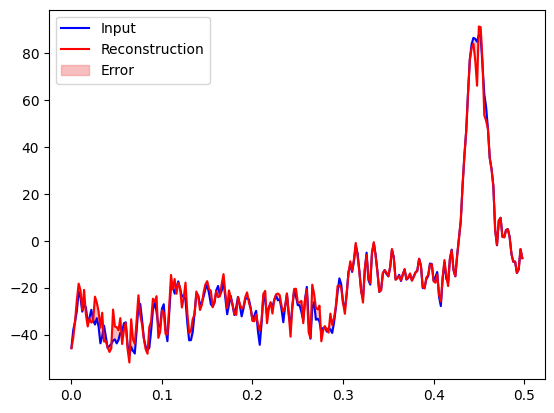

In [69]:
t = np.arange(0, 0.5, 1/500)

plt.plot(t, x[0:250], 'b', label="Input")

plt.plot(t, y[0:250], 'r', label="Reconstruction")

plt.fill_between(t, y[0:250], x[0:250], color='lightcoral', alpha=0.5, label="Error")

plt.legend()
plt.show()

In [50]:
x = pd.read_csv('/content/testdata.csv', header = None)

<function matplotlib.pyplot.show(close=None, block=None)>

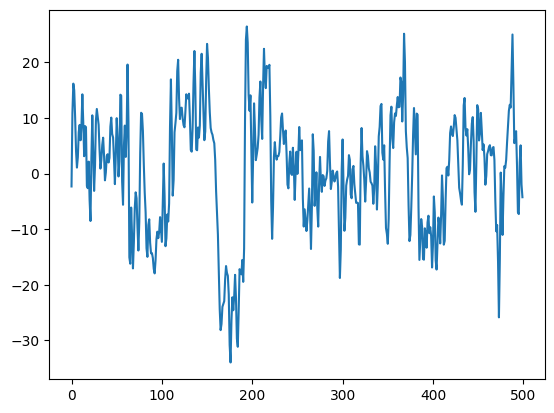

In [51]:
plt.plot(x.iloc[0, 0:500])
plt.show

In [52]:
x = x.to_numpy().flatten()
x = x[0:7200]
x = x.reshape(100, 72)
x = scaler.fit_transform(x)
x = x.reshape(720, 10, 1)
y = model.predict(x)
y = y.flatten()
y = y.reshape(100, 72)
y = scaler.inverse_transform(y)
x = x.reshape(100, 72)
x = scaler.inverse_transform(x)
y = y.flatten()
x = x.flatten()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


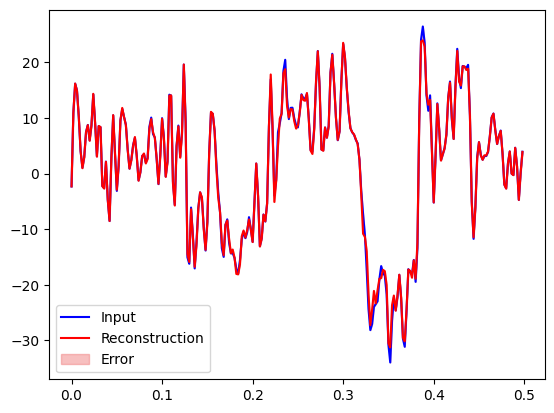

In [53]:
t = np.arange(0, 0.5, 1/500)

plt.plot(t, x[0:250], 'b', label="Input")

plt.plot(t, y[0:250], 'r', label="Reconstruction")

plt.fill_between(t, y[0:250], x[0:250], color='lightcoral', alpha=0.5, label="Error")

plt.legend()
plt.show()